In [3]:
import numpy as np 
import pandas as pd 

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(50000, 2)

In [11]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
df.duplicated().sum()

418

In [21]:
df = df.drop_duplicates()

In [23]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [25]:
df = df.iloc[:10000]

### Data Cleaning

In [28]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
10012,I was pleasantly surprised to find that How to...,positive
10013,This is a very moving film that takes a new tw...,positive
10014,Apart from the beautiful imagery thanks to New...,negative
10015,This is a perfect series for family viewing. W...,positive


In [30]:
#conversion in lower case
df.loc[:,"review"] = df["review"].str.lower()

In [32]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [40]:
#removing whitespaces

df.loc[:,'review'] = df['review'].str.strip()

In [42]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [44]:
# #remove HTML Tags
# import re

# def remove_html(data):
#     data = re.sub(r'<.*?>', '', data)
#     return data

In [9]:
# df['review'].apply(remove_html) OR
df.loc[:,"review"] = df['review'].str.replace(r'<.+?>','', regex=True)


In [18]:
df.iloc[0].values

array(["one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other s

In [19]:
# code to check if data has URLs
df[df['review'].str.contains(r'https?://\S+\.\S+|https?://www\.\S+\.\S+|www\.\S+\.\S+','', regex=True)].iloc[0].values

array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
       'negative'], dtype=object)

In [10]:
#removing URLs by using library Regex
import re

df.loc[:,"review"] = df['review'].str.replace(r'https?://\S+\.\S+|https?://www\.\S+\.\S+|www\.\S+\.\S+','', regex=True)

In [21]:
#short code to remove URLs
def rem(data):
    data = re.sub(r'https?://\S+|www\.\S+',"remove",data)
    return data


print(rem("https://umar.com"))
print(rem("http://umar.com"))
print(rem("https://www.umar.com"))
print(rem("http://www.umar.com"))
print(rem("www.umar.com"))



remove
remove
remove
remove
remove


In [11]:
# removing contractions 

patterns = {
    r"he's": "he is",
    r"there's": "there is",
    r"We're": "We are",
    r"That's": "That is",
    r"won't": "will not",
    r"they're": "they are",
    r"Can't": "Cannot",
    r"wasn't": "was not",
    r"don't": "do not",
    r"aren't": "are not",
    r"isn't": "is not",
    r"What's": "What is",
    r"haven't": "have not",
    r"hasn't": "has not",
    r"There's": "There is",
    r"He's": "He is",
    r"It's": "It is",
    r"You're": "You are",
    r"I'M": "I am",
    r"shouldn't": "should not",
    r"wouldn't": "would not",
    r"i'm": "I am",
    r"I'm": "I am",
    r"Isn't": "is not",
    r"Here's": "Here is",
    r"you've": "you have",
    r"you're": "you are",
    r"we're": "we are",
    r"what's": "what is",
    r"couldn't": "could not",
    r"we've": "we have",
    r"it's": "it is",
    r"doesn't": "does not",
    r"who's": "who is",
    r"y'all": "you all",
    r"would've": "would have",
    r"it'll": "it will",
    r"we'll": "we will",
    r"he'll": "he will",
    r"Y'all": "You all",
    r"Weren't": "Were not",
    r"Didn't": "Did not",
    r"they'll": "they will",
    r"they'd": "they would",
    r"DON'T": "DO NOT",
    r"that's": "that is",
    r"they've": "they have",
    r"i'd": "I would",
    r"should've": "should have",
    r"You're": "You are",
    r"where's": "where is",
    r"we'd": "we would",
    r"i'll": "I will",
    r"they're": "they are",
    r"let's": "let us",
    r"can't": "cannot",
    r"I've": "I have",
    r"I'll": "I will",
    r"I'd": "I would",
    r"Let's": "Let us",
    r"It's": "It is",
    r"Haven't": "Have not",
    r"Could've": "Could have",
    r"you've": "you have",
    r"you'll": "you will",
    r"who'll": "who will"
}


# Compile a single regex pattern from all the keys of the dictionary
pattern = re.compile("|".join(patterns.keys()))
print(pattern)
# Replace occurrences of the patterns with their respective values
df.loc[:,"review"] = df["review"].apply(lambda string: pattern.sub(lambda match: patterns[match.group(0)], string))

re.compile("he's|there's|We're|That's|won't|they're|Can't|wasn't|don't|aren't|isn't|What's|haven't|hasn't|There's|He's|It's|You're|I'M|shouldn't|wouldn't|i'm|I'm|Isn't|Here's|you've|you're|we're|what's|couldn't|)


In [12]:
# removing contractions with contractions library, imported in the first cell.

import contractions

df.loc[:,"review"] = df["review"].apply(lambda x: contractions.fix(x))

In [24]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [25]:
# df = pd.read_csv('IMDB Dataset.csv')
# df = df.drop_duplicates()
# df = df.iloc[:5000]
# df.loc[:,"review"] = df["review"].str.lower()
# df.loc[:,'review'] = df['review'].str.strip()
# df['review'] = df['review'].str.replace(r'<.+?>','', regex=True)
# df[df['review'].str.contains(r'https?://\S+\.\S+|https?://www\.\S+\.\S+|www\.\S+\.\S+','', regex=True)]
# df["review"] = df["review"].apply(lambda x: contractions.fix(x))
# df

In [13]:
%%time
# tokenizing the column in dataframe using NLTK library

from nltk import download
download(['punkt'])
from nltk import word_tokenize


df.loc[:,"review"] = df["review"].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: total: 1min 19s
Wall time: 2min 45s


In [27]:
#Tokenization the column in dataframe using Spacy library, but its found to be slower than NLTK. However code is here
#we need to download this model before using it with spaCy. command is below
#python -m spacy download en_core_web_sm

# import spacy
# nlp = spacy.load("en_core_web_sm")
# df["review"] = df["review"].apply(lambda s: [token.text for token in nlp(s)])

In [28]:
df

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, ., the, fil...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, there, is, a, family, where, a, li...",negative
4,"[petter, mattei, 's, ``, love, in, the, time, ...",positive
...,...,...
10012,"[i, was, pleasantly, surprised, to, find, that...",positive
10013,"[this, is, a, very, moving, film, that, takes,...",positive
10014,"[apart, from, the, beautiful, imagery, thanks,...",negative
10015,"[this, is, a, perfect, series, for, family, vi...",positive


In [21]:
from collections import Counter
from nltk import download
download(['stopwords'])
from nltk.corpus import stopwords
stopwords.words('english')





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: unhashable type: 'list'

In [29]:
"""
%%time 

# spell correction using library autocorrect
# parallelization using library joblib
# profiling the code using library cProfile

from joblib import Parallel, delayed
from autocorrect import Speller
# import cProfile

spell = Speller(lang = 'en')

word_cache = {}

def word_check(word):
    if word in word_cache:
        return word_cache[word]
    else:
        corrected_word = spell(word)
        word_cache[word] = corrected_word
        return corrected_word
    

def spell_check(listing):
    corrected_tokens = (word_check(word) for word in listing)
    corrected_listing = ' '.join(corrected_tokens)
    return corrected_listing

sentences = df["review"]

num_cores = 4

corrected_sentences = Parallel(n_jobs=num_cores)(delayed(spell_check)(tokens) for tokens in sentences)

# def run_code_with_profiling():
   
#     profiler = cProfile.Profile()
#     profiler.enable()
    
#     corrected_sentences = Parallel(n_jobs=num_cores)(delayed(spell_check)(tokens) for tokens in sentences)
    
#     profiler.disable()
#     # Print profiling results
#     profiler.print_stats()

# run_code_with_profiling()


df.loc[:,"review"] = corrected_sentences



# df["review"] = df["review"].apply(spell_check)

"""

CPU times: total: 4min 27s
Wall time: 31min 6s


In [30]:
# handling punctuations by using library/module string

import string 


# def remove_punc(text):
#     for punc in string.punctuation:
#         if punc in text:
#             text = text.replace(punc, '')
    
#     df["review"] = text
#     return df
  
# def remove_punc_using_set(text):
#     punctuations = set(string.punctuation)
#     text = ''.join(char for char in text if char not in punctuations)
#     return text

df.loc[:,"review"] = df["review"].apply(lambda sentence : ''.join(char for char in sentence if char not in string.punctuation))

# remove_punc("Hi!, how are you?")

In [31]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,better matter s love in the time of money is...,positive
...,...,...
10012,i was pleasant surprised to find that how to l...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing w...,positive


In [32]:
#removing extra white spaces by using Regex

df.loc[:,"review"] = df["review"].replace(r'\s+',' ', regex=True)

In [33]:
#removing special characters by using Regex although it has already been happened during punctuations removal.

df.loc[:,"review"] = df["review"].replace(r'[^\w\s]','', regex=True)

In [34]:
df.iloc[0].values

array(['one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the onward maximum security state penitentiary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda them city is home to many areas muslims gangster latino christians italian irish and more so scuffle death states dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget 

### Data Preprocessing

In [35]:
#created copy from clean dataframe to work further on it

cleaned_df = df.copy()

In [36]:
cleaned_df.iloc[3].values

array(['basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become ramo and kill the zombieok first of all when you are going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialog as for the shots with jake just ignore them ',
       'negative'], dtype=object)

In [37]:
#Since tokenization is a part of preprocessing so have to do it again. 
from nltk.tokenize import word_tokenize

cleaned_df["tokenized_review"] = cleaned_df["review"].apply(word_tokenize)

In [38]:
cleaned_df

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,better matter s love in the time of money is a...,positive,"[better, matter, s, love, in, the, time, of, m..."
...,...,...,...
10012,i was pleasant surprised to find that how to l...,positive,"[i, was, pleasant, surprised, to, find, that, ..."
10013,this is a very moving film that takes a new tw...,positive,"[this, is, a, very, moving, film, that, takes,..."
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, from, the, beautiful, imagery, thanks,..."
10015,this is a perfect series for family viewing we...,positive,"[this, is, a, perfect, series, for, family, vi..."


In [39]:
# stop words removal by using NLTK library

from nltk import download
download(['stopwords'])
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
%%time 

cleaned_df["tokenized_review"] = cleaned_df["tokenized_review"].apply(lambda s: ' '.join(word for word in s if word not in stopwords.words('english')))


CPU times: total: 7min 16s
Wall time: 7min 44s


In [41]:
cleaned_df.iloc[0].values

array(['one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the onward maximum security state penitentiary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda them city is home to many areas muslims gangster latino christians italian irish and more so scuffle death states dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget 

### EDA on Data

In [99]:
#created copy from preprocessed dataframe to work further on it

processed_df = cleaned_df.copy()

In [100]:
processed_df["review"] = processed_df["tokenized_review"]

In [101]:
processed_df["tokenized_review"] = processed_df["tokenized_review"].apply(word_tokenize)

In [102]:
processed_df

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,better matter love time money visually stunnin...,positive,"[better, matter, love, time, money, visually, ..."
...,...,...,...
10012,pleasant surprised find lose friends alienate ...,positive,"[pleasant, surprised, find, lose, friends, ali..."
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r..."
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala..."
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro..."


In [103]:
processed_df["char_length"] = processed_df["review"].str.len()

In [104]:

processed_df["word_length"] = processed_df["tokenized_review"].apply(len)

In [105]:
processed_df

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1114,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",648,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",585,86
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",438,64
4,better matter love time money visually stunnin...,positive,"[better, matter, love, time, money, visually, ...",854,125
...,...,...,...,...,...
10012,pleasant surprised find lose friends alienate ...,positive,"[pleasant, surprised, find, lose, friends, ali...",653,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",412,59
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1077,151
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro...",1020,149


C:\Users\umare\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


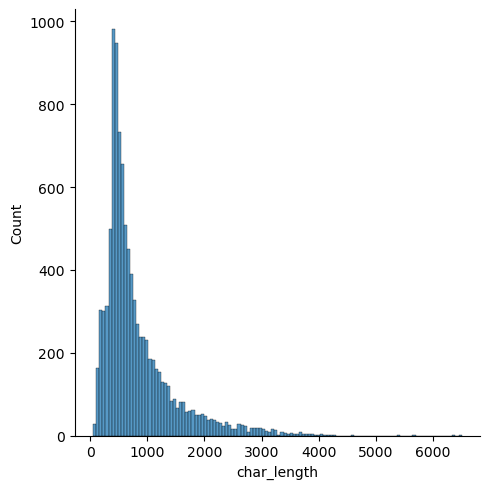

In [106]:
#drawing plot by using seaborn library

import seaborn as sns
sns.displot(processed_df["char_length"])

In [107]:
processed_df[processed_df["sentiment"] == "positive"]

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1114,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",648,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",585,86
4,better matter love time money visually stunnin...,positive,"[better, matter, love, time, money, visually, ...",854,125
5,probably alltime favorite movie story selfless...,positive,"[probably, alltime, favorite, movie, story, se...",385,56
...,...,...,...,...,...
10009,former cambridge contemporary simon header tod...,positive,"[former, cambridge, contemporary, simon, heade...",3690,482
10010,man navy comments indicated rare wellfilmed lo...,positive,"[man, navy, comments, indicated, rare, wellfil...",693,107
10012,pleasant surprised find lose friends alienate ...,positive,"[pleasant, surprised, find, lose, friends, ali...",653,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",412,59


C:\Users\umare\AppData\Local\Temp\ipykernel_9224\3072989764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processed_df[processed_df["sentiment"] == "positive"]["char_length"])
C:\Users\umare\AppData\Local\Temp\ipykernel_9224\3072989764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pr

<Axes: xlabel='char_length', ylabel='Density'>

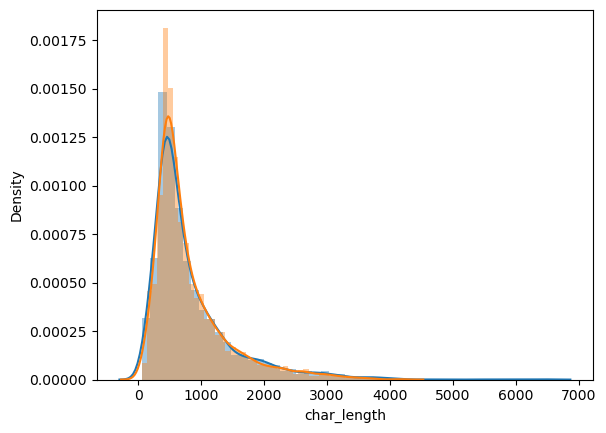

In [109]:
sns.distplot(processed_df[processed_df["sentiment"] == "positive"]["char_length"])
sns.distplot(processed_df[processed_df["sentiment"] == "negative"]["char_length"])

C:\Users\umare\AppData\Local\Temp\ipykernel_9224\436166094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processed_df[processed_df["sentiment"] == "positive"]["word_length"])
C:\Users\umare\AppData\Local\Temp\ipykernel_9224\436166094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proc

<Axes: xlabel='word_length', ylabel='Density'>

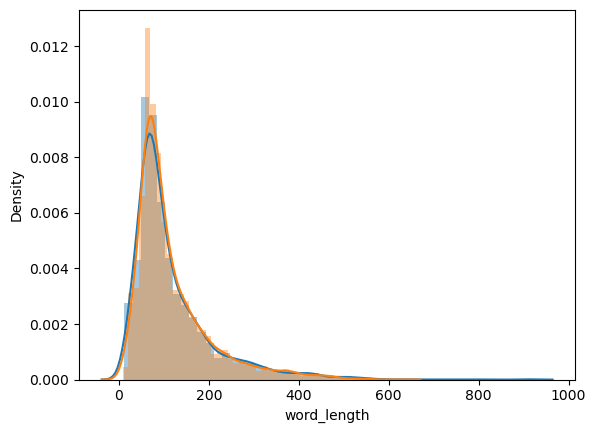

In [108]:
sns.distplot(processed_df[processed_df["sentiment"] == "positive"]["word_length"])
sns.distplot(processed_df[processed_df["sentiment"] == "negative"]["word_length"])

In [110]:
processed_df

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1114,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",648,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",585,86
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",438,64
4,better matter love time money visually stunnin...,positive,"[better, matter, love, time, money, visually, ...",854,125
...,...,...,...,...,...
10012,pleasant surprised find lose friends alienate ...,positive,"[pleasant, surprised, find, lose, friends, ali...",653,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",412,59
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1077,151
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro...",1020,149


In [113]:
# ngrams analysis by using NLTK

from nltk import ngrams
pd.Series(ngrams(processed_df["tokenized_review"].sum(),2)).value_counts()


(I, would)            501
(ever, seen)          469
(special, effects)    450
(let, us)             401
(even, though)        395
                     ... 
(virginia, said)        1
(movie, allowed)        1
(allowed, comment)      1
(comment, mistake)      1
(hurt, yet)             1
Name: count, Length: 829552, dtype: int64

In [114]:
%%time
from nltk import ngrams
pd.Series(ngrams(processed_df["tokenized_review"].sum(),3)).value_counts()

CPU times: total: 2min 16s
Wall time: 2min 31s


(movie, ever, seen)       95
(worst, movie, ever)      90
(I, would, like)          57
(movies, ever, seen)      56
(one, worst, movies)      55
                          ..
(dying, shut, feeling)     1
(shut, feeling, read)      1
(feeling, read, book)      1
(read, book, captains)     1
(head, hurt, yet)          1
Name: count, Length: 1147044, dtype: int64

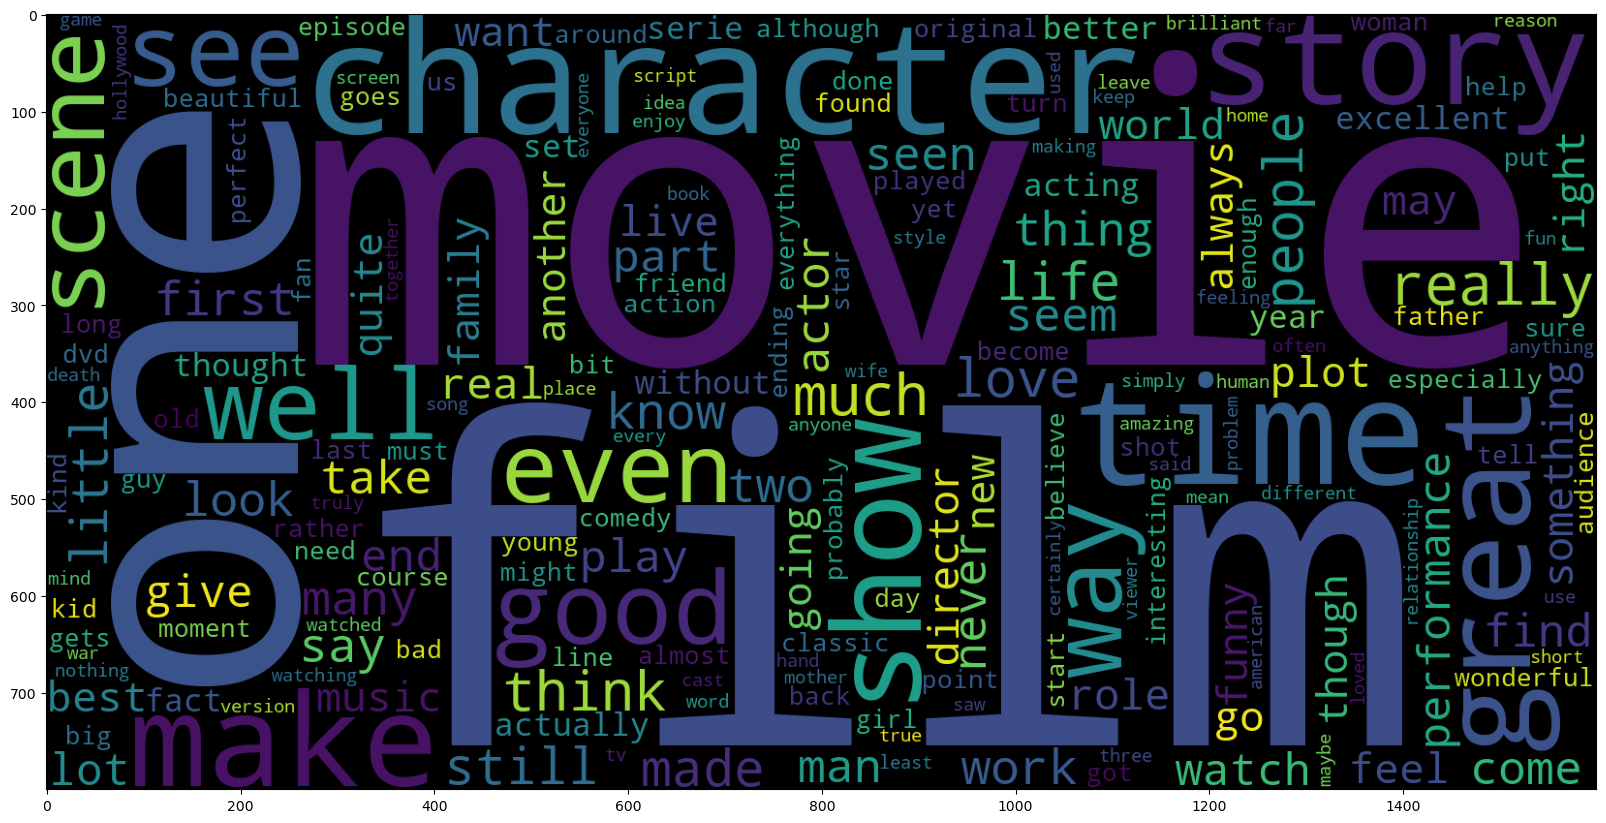

In [118]:
# using wordcloud library

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # positive review text
wc = WordCloud(width = 1600, height = 800).generate(" ".join(processed_df[processed_df["sentiment"] == "positive"]["review"]))
plt.imshow(wc)

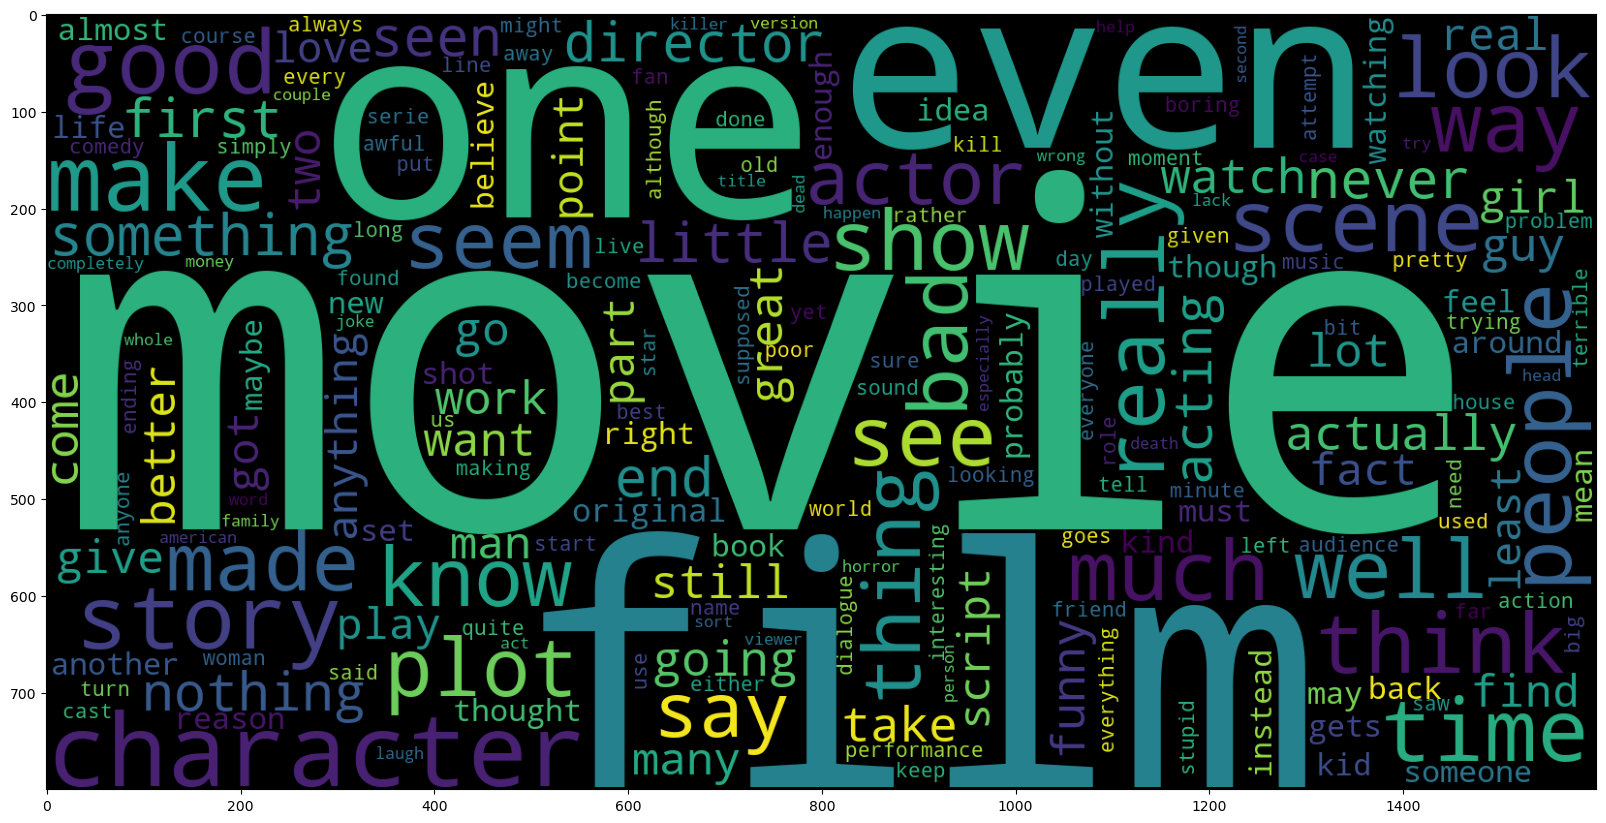

In [119]:
plt.figure(figsize = (20,20)) # positive review text
wc = WordCloud(width = 1600, height = 800).generate(" ".join(processed_df[processed_df["sentiment"] == "negative"]["review"]))
plt.imshow(wc)

### Vectorization

In [121]:
exploratory_df = processed_df.copy()

In [122]:
exploratory_df

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1114,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",648,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",585,86
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",438,64
4,better matter love time money visually stunnin...,positive,"[better, matter, love, time, money, visually, ...",854,125
...,...,...,...,...,...
10012,pleasant surprised find lose friends alienate ...,positive,"[pleasant, surprised, find, lose, friends, ali...",653,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",412,59
10014,apart beautiful imagery thanks new zealand cin...,negative,"[apart, beautiful, imagery, thanks, new, zeala...",1077,151
10015,perfect series family viewing gather around tv...,positive,"[perfect, series, family, viewing, gather, aro...",1020,149


In [129]:
# implementing bag of words(BoW) to vectorize by using sklearn library

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 5000, ngram_range=(1,1))
bag_of_words = count_vectorizer.fit_transform(exploratory_df["review"])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [130]:
bag_of_words

,10,100,1000,1010,11,110,12,13,13th,14,...,york,young,younger,yous,youth,youthful,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 5000, ngram_range=(2,2))
bag_of_words = count_vectorizer.fit_transform(exploratory_df["review"])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [132]:
bag_of_words

,10 10,10 lines,10 minutes,10 stars,10 year,10 years,100 times,100 years,12 year,12 years,...,young men,young people,young son,young woman,young women,younger brother,zero stars,zombie film,zombie movie,zombie movies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features = 5000, ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(exploratory_df["review"])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [134]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young man,young people,young woman,younger,yous,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [136]:
pca_result.shape

(10000, 2)

<Axes: >

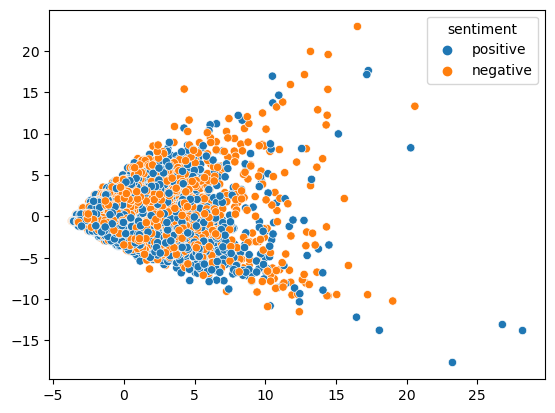

In [139]:
sns.scatterplot(x = pca_result[:,0],y = pca_result[:,1], hue = exploratory_df["sentiment"])